# Atividade 2 - Visão Computacional

O entregável de toda esta atividade vai ser um código-fonte em *Python*. 

Encorajamos vocês a fazerem vídeos demonstrando o resultado e a postar (pode ser privadamente) no YouTube

Você pode entregar enviando o código para o Github e postando o vídeo *ou* mostrando ao vivo aos professores

**Não programe no Jupyter** - use um programa Python



Obs.: [Instale o GIT-FLS](../guides/git_lfs.md) para poder baixar este repositório.



Você deve ter uma folha com o padrão anexo. 
*Dica:* Se não tiver, é possível fazer também com um tablet ou *smartphone*
 
<img src="folha_atividade.png" width=300>

## Parte 1 - calibração

Ouça a explicação do professor sobre o modelo de câmera *pinhole*  e desenhe a medida $f$ que separa o plano focal da pupila da câmera

Detalhe como calculou $f$

A medida f que separa o plano focal da pupila da câmera pode ser calculada a partir de relações de proporcionalidade estabelecidas com base em princípios ópticos, com foco na propagação retilínea da luz. A imagem a seguir mostra essas relações de proporcionalidade.

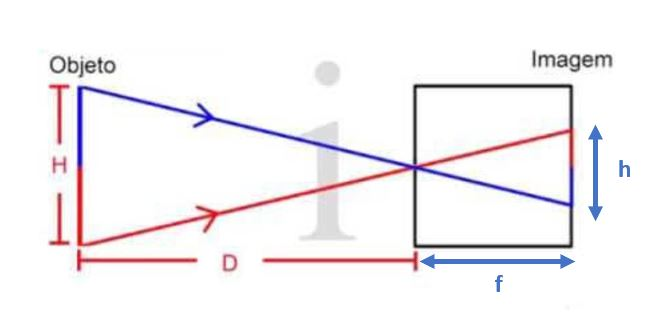

D é a distância entre a folha e a tela (cm)


H é a distância entre os círculos, em cm


h é a distância entre os círculos na imagem da tela, medida em pixels

As distancias H e D foram medidas com regua e h foi medido pelo Paint:

H=14cm


D=22,5cm


h=440px

A partir delas, foi calculado f, substituindo na formula:

f = (h * D) / H

f=707

## Parte 2

Modifique um dos exemplos `draw_circles_video.py` ou `videoplay.py` para passar a ler dados da webcam e identificar o círculo magenta e o círculo ciano, usando o `inRange`

#### As respostas das partes 2 a 5 estao exibidas em um unico codigo fonte abaixo

## Parte 3

Assumindo que a folha se mantém sempre paralela ao plano de imagem da câmera, imprima a distância entre a folha e sua câmera

De posse das coordenadas dos centros dos círculos, a distância entre eles foi calculada de acordo com a fórmula a seguir:

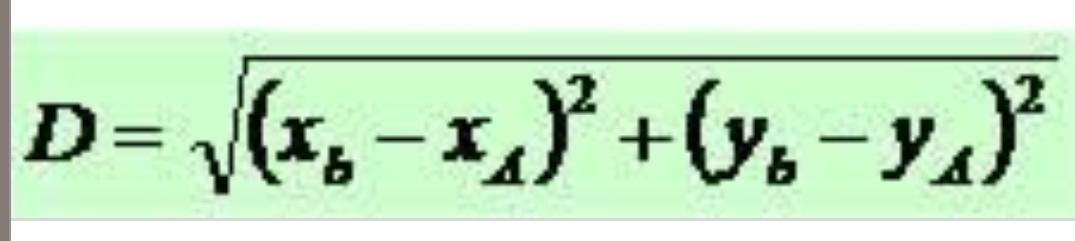

Com essa medida, é possível calcular a distância entre a folha e a tela da seguinte maneira:


D = (H * d) / f

## Parte 4

Trace uma linha entre os centros do círculo magenta e do círculo ciano.

Imprima na tela o ângulo entre esta linha e a horizontal

O ângulo entre os dois círculos foi calculado a partir do coeficiente angular da reta tangente que liga os dois círculos, ou seja, ∆y/∆x.

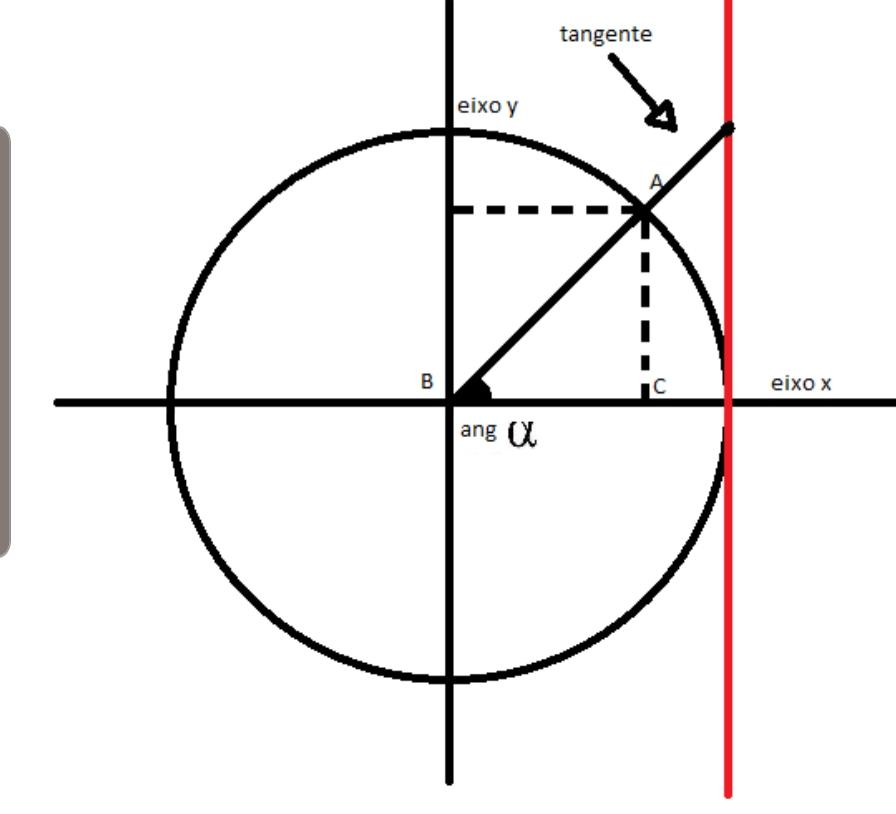

## Parte 5

Baseado nos círculos encontrados pela transformada de Hough, desenhe um círculo sobre o círculo ciano e outro sobre o círculo magenta.

Dica: Use a função `cv2.circle` e veja o exemplo [draw_circles_video.py](draw_circles_video.py).

**Desafio bônus**: ser capaz de eliminar circulos espúrios (aqueles que não são os da folha)

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

__author__      = "Matheus Dib, Fabio de Miranda"

import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import math
import matplotlib.cm as cm

# If you want to open a video, just change v2.VideoCapture(0) from 0 to the filename, just like below
#cap = cv2.VideoCapture('hall_box_battery.mp4')

# Parameters to use when opening the webcam.
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

lower = 0
upper = 1

# Funcao comparativa, definida para ordenar os raios dos circulos de maior para menor 
#para identificar os circulos principais
def comp(a,b):
    if a[1] > b[1]:
        return -1
    elif a[1] == b[1]:
        return 0
    else:
        return 1


print("Press q to QUIT")

# Returns an image containing the borders of the image
# sigma is how far from the median we are setting the thresholds
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged


 
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # A gaussian blur to get rid of the noise in the image
    blur = cv2.GaussianBlur(gray,(5,5),0)
    #blur = gray
    # Detect the edges present in the image
    bordas = auto_canny(blur)


    circles = []

    out_circles = []


    # Obtains a version of the edges image where we can draw in color
    bordas_color = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)

     
#################PARTE 02########################


#cria mascara magenta
    magenta_menor = np.array([166,  50,  50])
    magenta_maior = np.array([176, 255, 255])
    mask_coke_mag = cv2.inRange(hsv, magenta_menor, magenta_maior)

#cria mascara ciano
    ciano_menor = np.array([100, 50, 50])
    ciano_maior = np.array([110, 255, 255])
    mask_coke_cian = cv2.inRange(hsv, ciano_menor, ciano_maior)


#Soma as duas mascaras, definindo um filtro para a imagem com apenas essas duas cores
    masks = mask_coke_mag + mask_coke_cian

    imagem = cv2.bitwise_or(frame, frame, mask=masks)
    
#Transforma a imagem de saida em cinza para que ela possa ser fornecida ao HoughCircles
    imagem2 = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

      

    # HoughCircles - detects circles using the Hough Method. For an explanation of
    # param1 and param2 please see an explanation here http://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
    circles = None
    circles=cv2.HoughCircles(imagem2,cv2.HOUGH_GRADIENT,2,70,param1=50,param2=60,minRadius=5,maxRadius=100)


  

    if circles is not None:        
        circles = np.uint16(np.around(circles)).astype("int")
        for i in circles[0,:]:
            print(i)
            # draw the outer circle
            # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
           
           
#############PARTE 05##########################
            cv2.circle(bordas_color,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(bordas_color,(i[0],i[1]),i[2],(0,0,255),3)

            out_circles.append( ((i[0], i[1]) , i[2]) )

            if len(out_circles)>=2:
                # Encontrando as coordenadas dos centros dos circulos
                x, y = out_circles[0][0]
                x2, y2 = out_circles[1][0]
              

                print(x, x2, y, y2)
                font = cv2.FONT_HERSHEY_SIMPLEX
                
#####################PARTE 03#######################                

                #distancia entre os dois circulos
                deltaX=(x-x2)**2
                deltaY=(y-y2)**2
                h=(deltaX+deltaY)**(0.5)

                #Parametros medidos anteriormente
                H=14
                f=707
                
                #distancia entre folha e camera
                D=(H*f)/h

                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(imagem, "Distancia: {}".format(D) ,(0,450), font, (0.75),(255,255,255),2,cv2.LINE_AA)

                                
                
#####################PARTE 04#######################

                #linha entre circulos
                cv2.line(imagem, (x,y), (x2,y2), (0, 255, 0), thickness=3, lineType=8)

                #angulo entre linha entre circulos e a horizontal
                Y=(y-y2)
                X=(x-x2)
                angulo=math.atan2(Y,X)
                angulo=math.degrees(angulo)

                #print(angulo)
                cv2.putText(bordas_color,"Angulo: {}".format(angulo),(0,400), font, (0.75),(255,255,255),2,cv2.LINE_AA)


            #cv2.imshow('img', img)


    out_circles.sort(cmp = comp)

    print(out_circles)



    # Draw a diagonal blue line with thickness of 5 px
    # cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    #cv2.line(bordas_color,(0,0),(511,511),(255,0,0),5)

    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    #cv2.rectangle(bordas_color,(384,0),(510,128),(0,255,0),3)

    # cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(bordas_color,'Press q to quit',(0,50), font, 1,(255,255,255),2,cv2.LINE_AA)

    #More drawing functions @ http://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html

    # Display the resulting frame
    #cv2.imshow('Detector de circulos',bordas_color)
    #cv2.imshow('Frame',frame)
 
 
    tudo = bordas_color + imagem 

    cv2.imshow('Tudo', tudo)



    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#  When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

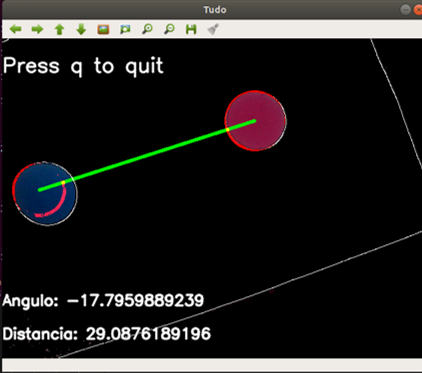

## Parte 6

Usando um detector de features `BRISK`, identifique o escrito *Insper* na folha. Veja os exemplos [no notebook](BRISK%20Features.ipynb) e em [em código](features.py) .

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import numpy as np
import cv2
from matplotlib import pyplot as plt
from math import pi
import matplotlib.cm as cm


# Cria o detector BRISK
brisk = cv2.BRISK_create()


# Configura o algoritmo de casamento de features que vê *como* o objeto que deve ser encontrado aparece na imagem
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# Define o mínimo de pontos similares
MINIMO_SEMELHANCAS = 18


def find_good_matches(descriptor_image1, frame_gray):
    """
        Recebe o descritor da imagem a procurar e um frame da cena, e devolve os keypoints e os good matches
    """
    des1 = descriptor_image1
    kp2, des2 = brisk.detectAndCompute(frame_gray,None)

    # Tenta fazer a melhor comparacao usando o algoritmo
    matches = bf.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)

    return kp2, good


if __name__ == "__main__":

    cap = cv2.VideoCapture(0)

    original_rgb = cv2.imread("LogoInsper.png")  # Imagem a procurar
    img_original = original_rgb#cv2.cvtColor(original_rgb, cv2.COLOR_BGR2GRAY)
    #original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)


    # Encontra os pontos únicos (keypoints) nas duas imagems
    kp1, des1 = brisk.detectAndCompute(img_original ,None)


    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        if ret == False:
            print("Problema para capturar o frame da câmera")
            continue

        # Our operations on the frame come here
        frame_rgb = frame #cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        kp2, good_matches = find_good_matches(des1, gray)

        if len(good_matches) > MINIMO_SEMELHANCAS:
            img3 = cv2.drawMatches(original_rgb,kp1,frame_rgb,kp2, good_matches, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
            cv2.imshow('BRISK features', img3)
        else:
            cv2.imshow("BRISK features", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

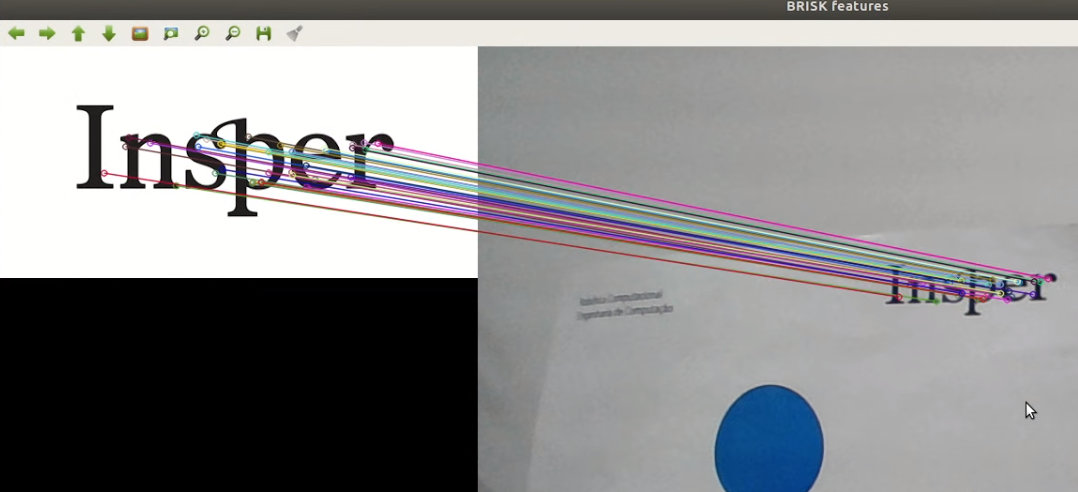